 # Advanced Regression Case Study

Anil Kumar M

## Objective:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 
***The company wants to know:***

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [264]:
# Import Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



### Data Understanding:
Load data from csv and Let's take a look at the first few rows

In [265]:
# Load data from csv
house_data = pd.read_csv("F:\\Upgrad\\AdvancedRegression\\train.csv",encoding = "ISO-8859-1")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [266]:
#Check all columns 
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [267]:
#get shape of dataframe
house_data.shape

(1460, 81)

In [268]:
#get model description of dataframe
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [269]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [270]:
#cheked any null column exist or not
nuni = house_data.nunique()
nuni[nuni==0]

Series([], dtype: int64)

In [271]:
round(100*(house_data.isnull().sum()/len(house_data.index)), 2).sort_values(ascending = False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [272]:
#Drop columns with maximum missing values
house_data = house_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])

In [273]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [274]:
#check unique values of FireplaceQu 
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [275]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [276]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')

In [277]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [278]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [279]:
#check median of LotFrontage
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [280]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

In [281]:
#impute missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [282]:
#replace Nan values of MasVnrArea with None i.e. No Masonary type
house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [283]:
#replace Nan values of BsmtQual with NA i.e. No Basement
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [284]:
#replace Nan values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [285]:
#replace Nan values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [286]:
#replace Nan values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [287]:
#replace Nan values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [288]:
#impute missing values of Electrical with mode due to categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [289]:
#replace Nan values of GarageType with NA i.e. No Garage
house_data.GarageType = house_data.GarageType.fillna('NA')

In [290]:
#replace Nan values of GarageYrBlt with 0 i.e. No Garage
house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [291]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [292]:
#replace Nan values of GarageQual with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [293]:
#replace Nan values of GarageFinish with NA i.e. No Garage
house_data.GarageQual = house_data.GarageQual.fillna('NA')

In [294]:
#replace Nan values of GarageCond with NA i.e. No Garage
house_data.GarageCond = house_data.GarageCond.fillna('NA')

In [295]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [296]:
#calculate the age of house i.e. HouseAge from YrSold - YearBuilt 
house_data['HouseAge'] = house_data.YrSold - house_data.YearBuilt

In [297]:
#Drop YrSold, YearBuilt after HouseAge
house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [298]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
house_data = house_data.astype(convert_dict)

In [299]:
#convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [300]:
#convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [301]:
#convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
house_data = house_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [302]:
#convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
house_data = house_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [303]:
#convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [304]:
#convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [305]:
#convert FireplaceQu 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
house_data = house_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [306]:
house_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [307]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [308]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [309]:
#Drop columns which have moe than 80% bias data
house_data=house_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [310]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [311]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


### Create Dummy Varibales

In [312]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(house_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
house_data = pd.concat([house_data,MSSubClass_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [313]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [314]:
#concat MSZoning_df with main house_data df
house_data = pd.concat([house_data,MSZoning_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [315]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')

In [316]:
#concat LotShape_df with main house_data df
house_data = pd.concat([house_data,LotShape_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [317]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [318]:
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,LotConfig_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [319]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
house_data = pd.concat([house_data,Neighborhood_df],axis=1)
house_data.head()

#Create object for binary encoding
# encoder= ce.BinaryEncoder(cols=['Neighborhood'],return_df=True)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [320]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
house_data = pd.concat([house_data,HouseStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [321]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
house_data = pd.concat([house_data,RoofStyle_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [322]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
house_data = pd.concat([house_data,Exterior1st_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [323]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
house_data = pd.concat([house_data,Exterior2nd_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,0,12,250000,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0

In [324]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
house_data = pd.concat([house_data,MasVnrType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,4,PConc,4,3,6,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3,Attchd,2000.

In [325]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
house_data = pd.concat([house_data,Foundation_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8

In [326]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
house_data = pd.concat([house_data,GarageType_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [327]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
house_data = pd.concat([house_data,GarageFinish_df],axis=1)
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,4,PConc,4,1,6,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,0,2,208500,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,Gable,MetalSd,MetalSd,None,0.0,3,CBlock,4,4,5,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,0,5,181500,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,4,PConc,4,2,6,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,0,9,223500,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1970,Gable,Wd Sdng,Wd Shng,None,0.0,3,BrkTil,3,1,5,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,0,2,140000,91,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [328]:
house_data.shape

(1460, 162)

In [329]:
#Drop categorical variables after ceating dummy varaibles
house_data=house_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [330]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


### Prepairing Data For Modeling

In [331]:
df_train,df_test = train_test_split(house_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [332]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,102

### Rescalling The Numeric Factors

In [333]:
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,1.159065,-0.293313,-0.454262,0.621091,0.871757,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,0.741868,1.555150,0.622148,0.658513,0.274068,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,260000,-0.675791,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,-0.761831,-0.293313,0.172244,-0.712611,-1.181447,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,-0.776063,0.308833,0.622148,1.206469,0.177351,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,113000,0.939707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,-0.964030,-0.293313,-0.175567,-1.257424,-0.154845,-0.421449,0.667284,-0.124502,0.219811,-0.837450,-0.247791,-1.028080,-0.753316,-1.044452,-0.234155,0.741868,-0.937484,-0.927153,-0.985354,0.179549,-1.034916,-1.023035,2.422143,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.10

In [334]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000

### Training The Model

In [335]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [336]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=148)

### RFE- Recursive Feature Elimination

___Take Top 35 Features from `RFE`___

In [337]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 35)
rfe = rfe.fit(X_train,y_train)

In [338]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 48),
 ('LotArea', False, 43),
 ('OverallQual', True, 1),
 ('OverallCond', False, 7),
 ('YearRemodAdd', False, 95),
 ('MasVnrArea', False, 84),
 ('ExterQual', False, 56),
 ('BsmtQual', False, 3),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 63),
 ('BsmtFinSF1', False, 14),
 ('BsmtFinSF2', False, 19),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', False, 20),
 ('HeatingQC', False, 104),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 17),
 ('GrLivArea', False, 16),
 ('BsmtFullBath', False, 11),
 ('BsmtHalfBath', False, 93),
 ('FullBath', False, 88),
 ('HalfBath', False, 75),
 ('BedroomAbvGr', False, 77),
 ('KitchenAbvGr', False, 31),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', False, 73),
 ('Fireplaces', False, 85),
 ('FireplaceQu', False, 97),
 ('GarageYrBlt', False, 109),
 ('GarageCars', True, 1),
 ('GarageArea', False, 87),
 ('WoodDeckSF', False, 91),
 ('OpenPorchSF', False, 108),
 ('EnclosedPorch', False, 102),
 ('3SsnPorch', Fal

In [339]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_180', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn'], dtype='object')

In [340]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'GarageType_CarPort', 'GarageFinish_Unf'], dtype='object', length=113)

### Building model using statsmodel, for the detailed statistics

In [341]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [342]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [343]:
#create a RFE model
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [344]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:55:14   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     986   BIC:                         2.439e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.931      0.000    1.32e+05    1.75e+05
OverallQual           2.002e+04   1893.534     10.571      0.000    1.63e+04    2.37e+04
BsmtExposure          1.087e+04   1229.363      8.839      0.000    8453.342    1.33e+04
1stFlrSF              2.325e+04   1535.816     15.141      0.000    2.02e+04    2.63e+04
2ndFlrSF              1.895e+04   1427.915     13.269      0.000    1.61e+04    2.17e+04
KitchenQual           1.013e+04   1512.979      6.694      0.000    7159.290    1.31e+04
GarageCars            9541.0521   1710.893      5.577      0.000    6183.642    1.29e+04
MSSubClass_45        -2.258e+04   2.64e+04     -0.856      0.392   -7.44e+04    2.92e+04
MSSubClass_180       -8637.3774   1.54e+04     -0.559      0.576   -3.89e+04    2.17e+04
MSSubClass_190       -1.282e+04   7221.412     -1.775      0.076    -2.7e+04    1352.028
MSZoning_RM           -1.61e+04   3440.848     -4.679      0.000   -2.29e+04   -9345.957
LotShape_IR3         -1.694e+04   1.15e+04     -1.468      0.143   -3.96e+04    5712.282
LotConfig_FR3        -1.931e+04   1.97e+04     -0.981      0.327    -5.8e+04    1.93e+04
Neighborhood_ClearCr  9656.0110   7891.674      1.224      0.221   -5830.396    2.51e+04
Neighborhood_Edwards -1.404e+04   4341.035     -3.235      0.001   -2.26e+04   -5523.950
Neighborhood_NPkVill -1.029e+04   1.39e+04     -0.739      0.460   -3.76e+04     1.7e+04
Neighborhood_NoRidge  6.209e+04   6574.791      9.443      0.000    4.92e+04     7.5e+04
Neighborhood_NridgHt  4.435e+04   5411.133      8.196      0.000    3.37e+04     5.5e+04
Neighborhood_Somerst  1.702e+04   5026.126      3.386      0.001    7154.705    2.69e+04
Neighborhood_StoneBr  2.205e+04   9827.518      2.244      0.025    2765.883    4.13e+04
HouseStyle_1.5Unf     1.617e+04   2.43e+04      0.667      0.505   -3.14e+04    6.38e+04
RoofStyle_Gambrel     1.896e+04   1.97e+04      0.963      0.336   -1.97e+04    5.76e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.054      0.292   -1.03e+05    3.11e+04
Exterior1st_BrkFace    1.65e+04   6436.112      2.563      0.011    3865.068    2.91e+04
Exterior1st_CemntBd  -2.252e+04   2.45e+04     -0.920      0.358   -7.05e+04    2.55e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.882      0.378   -9.78e+04    3.72e+04
Exterior1st_Stone     -1.33e+04   2.43e+04     -0.548      0.584   -6.09e+04    3.43e+04
Exterior1st_Stucco   -1.709e+04   7945.677     -2.150      0.032   -3.27e+04   -1493.782
Exterior2nd_CmentBd   3.064e+04   2.45e+04      1.249      0.212   -1.75e+04    7.88e+04
GarageType_Attchd     2.979e+04   1.11e+04      2.683      0.007    8002.423    5.16e+04
GarageType_Basment    1.228e+04   1.49e+04      0.825      0.410   -1.69e+04    4.15e+04
GarageType_BuiltIn    2.661e+04    1.2e+04      2.219    

In [345]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
34,GarageFinish_NA,inf
33,GarageType_NA,inf
0,const,109.09
29,GarageType_Attchd,26.85
32,GarageType_Detchd,21.88
28,Exterior2nd_CmentBd,18.94
24,Exterior1st_CemntBd,18.83
31,GarageType_BuiltIn,7.72
7,MSSubClass_45,6.68
20,HouseStyle_1.5Unf,6.66


___MSSubClass_180 has higher p-value. Lets drop it.___

In [346]:
X_train_new = X_train_rfe.drop(['MSSubClass_180'],axis=1)

In [347]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_45', 'MSSubClass_190', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_FR3', 'Neighborhood_ClearCr', 'Neighborhood_Edwards', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'HouseStyle_1.5Unf', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn'], dtype='object')

___Rebuild the model without MSSubClass_180___

In [348]:
X_train_lm = sm.add_constant(X_train_new)

In [349]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [350]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     140.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:55:33   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     987   BIC:                         2.438e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.535e+05    1.1e+04     13.955      0.000    1.32e+05    1.75e+05
OverallQual           2.012e+04   1882.982     10.688      0.000    1.64e+04    2.38e+04
BsmtExposure          1.076e+04   1213.944      8.863      0.000    8376.529    1.31e+04
1stFlrSF              2.334e+04   1527.599     15.279      0.000    2.03e+04    2.63e+04
2ndFlrSF              1.898e+04   1426.346     13.305      0.000    1.62e+04    2.18e+04
KitchenQual           1.011e+04   1511.925      6.684      0.000    7139.016    1.31e+04
GarageCars            9550.1539   1710.220      5.584      0.000    6194.068    1.29e+04
MSSubClass_45         -2.23e+04   2.64e+04     -0.845      0.398   -7.41e+04    2.95e+04
MSSubClass_190       -1.269e+04   7214.994     -1.758      0.079   -2.68e+04    1472.232
MSZoning_RM          -1.637e+04   3403.910     -4.811      0.000   -2.31e+04   -9695.170
LotShape_IR3         -1.696e+04   1.15e+04     -1.469      0.142   -3.96e+04    5688.860
LotConfig_FR3        -1.918e+04   1.97e+04     -0.974      0.330   -5.78e+04    1.94e+04
Neighborhood_ClearCr  9756.0314   7886.901      1.237      0.216   -5720.989    2.52e+04
Neighborhood_Edwards -1.408e+04   4339.109     -3.244      0.001   -2.26e+04   -5561.289
Neighborhood_NPkVill -1.036e+04   1.39e+04     -0.745      0.457   -3.77e+04    1.69e+04
Neighborhood_NoRidge  6.184e+04   6557.385      9.430      0.000     4.9e+04    7.47e+04
Neighborhood_NridgHt  4.428e+04   5407.902      8.189      0.000    3.37e+04    5.49e+04
Neighborhood_Somerst  1.699e+04   5024.155      3.382      0.001    7132.228    2.69e+04
Neighborhood_StoneBr  2.217e+04   9821.852      2.257      0.024    2894.514    4.14e+04
HouseStyle_1.5Unf     1.602e+04   2.42e+04      0.661      0.509   -3.16e+04    6.36e+04
RoofStyle_Gambrel     1.902e+04   1.97e+04      0.967      0.334   -1.96e+04    5.76e+04
Exterior1st_AsphShn  -3.612e+04   3.42e+04     -1.055      0.292   -1.03e+05     3.1e+04
Exterior1st_BrkFace   1.646e+04   6433.622      2.559      0.011    3838.290    2.91e+04
Exterior1st_CemntBd  -2.315e+04   2.44e+04     -0.948      0.344   -7.11e+04    2.48e+04
Exterior1st_ImStucc  -3.039e+04   3.44e+04     -0.884      0.377   -9.79e+04    3.71e+04
Exterior1st_Stone    -1.357e+04   2.42e+04     -0.560      0.576   -6.11e+04     3.4e+04
Exterior1st_Stucco   -1.716e+04   7941.865     -2.160      0.031   -3.27e+04   -1573.374
Exterior2nd_CmentBd   3.013e+04   2.45e+04      1.229      0.219    -1.8e+04    7.82e+04
GarageType_Attchd     2.966e+04   1.11e+04      2.673      0.008    7888.551    5.14e+04
GarageType_Basment    1.152e+04   1.48e+04      0.777      0.437   -1.76e+04    4.06e+04
GarageType_BuiltIn    2.631e+04    1.2e+04      2.197      0.028    2805.637    4.98e+04
GarageType_Detchd     2.091e+04   1.11e+04      1.882    

___Exterior1st_Stone has higher p-value. Lets drop it.___

In [351]:
X_train_new = X_train_new.drop(['Exterior1st_Stone'],axis=1)

___Rebuild the model without Exterior1st_Stone___

In [352]:
X_train_lm = sm.add_constant(X_train_new)

In [353]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [354]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     145.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:55:48   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                     988   BIC:                         2.438e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.535e+05    1.1e+04     13.959      0.000    1.32e+05    1.75e+05
OverallQual           2.015e+04   1881.650     10.710      0.000    1.65e+04    2.38e+04
BsmtExposure          1.077e+04   1213.349      8.876      0.000    8389.175    1.32e+04
1stFlrSF              2.322e+04   1511.698     15.359      0.000    2.03e+04    2.62e+04
2ndFlrSF              1.897e+04   1425.767     13.305      0.000    1.62e+04    2.18e+04
KitchenQual           1.005e+04   1508.498      6.665      0.000    7093.310     1.3e+04
GarageCars            9590.3812   1708.117      5.615      0.000    6238.427    1.29e+04
MSSubClass_45        -2.225e+04   2.64e+04     -0.844      0.399    -7.4e+04    2.95e+04
MSSubClass_190       -1.265e+04   7212.187     -1.754      0.080   -2.68e+04    1503.516
MSZoning_RM          -1.639e+04   3402.574     -4.818      0.000   -2.31e+04   -9715.890
LotShape_IR3         -1.681e+04   1.15e+04     -1.458      0.145   -3.94e+04    5818.654
LotConfig_FR3        -1.925e+04   1.97e+04     -0.978      0.328   -5.79e+04    1.94e+04
Neighborhood_ClearCr  9869.7279   7881.547      1.252      0.211   -5596.767    2.53e+04
Neighborhood_Edwards -1.402e+04   4336.467     -3.233      0.001   -2.25e+04   -5510.925
Neighborhood_NPkVill -1.041e+04   1.39e+04     -0.749      0.454   -3.77e+04    1.69e+04
Neighborhood_NoRidge  6.198e+04   6550.144      9.463      0.000    4.91e+04    7.48e+04
Neighborhood_NridgHt  4.443e+04   5399.385      8.229      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.701e+04   5022.268      3.387      0.001    7157.026    2.69e+04
Neighborhood_StoneBr  2.227e+04   9816.751      2.269      0.024    3006.512    4.15e+04
HouseStyle_1.5Unf     1.598e+04   2.42e+04      0.659      0.510   -3.16e+04    6.35e+04
RoofStyle_Gambrel      1.91e+04   1.97e+04      0.971      0.332   -1.95e+04    5.77e+04
Exterior1st_AsphShn  -3.593e+04   3.42e+04     -1.050      0.294   -1.03e+05    3.12e+04
Exterior1st_BrkFace   1.661e+04   6426.035      2.585      0.010    4000.124    2.92e+04
Exterior1st_CemntBd  -2.314e+04   2.44e+04     -0.947      0.344   -7.11e+04    2.48e+04
Exterior1st_ImStucc  -3.044e+04   3.44e+04     -0.885      0.376   -9.79e+04     3.7e+04
Exterior1st_Stucco   -1.706e+04   7937.198     -2.149      0.032   -3.26e+04   -1485.092
Exterior2nd_CmentBd   3.022e+04   2.45e+04      1.233      0.218   -1.79e+04    7.83e+04
GarageType_Attchd      2.96e+04   1.11e+04      2.668      0.008    7831.329    5.14e+04
GarageType_Basment    1.155e+04   1.48e+04      0.779      0.436   -1.75e+04    4.06e+04
GarageType_BuiltIn    2.622e+04    1.2e+04      2.190      0.029    2728.584    4.97e+04
GarageType_Detchd     2.085e+04   1.11e+04      1.877      0.061    -944.904    4.26e+04
GarageType_NA         1.793e+04   6262.509      2.863    

___HouseStyle_1.5Unf has higher p-value. Lets drop it.___

In [355]:
X_train_new = X_train_new.drop(['HouseStyle_1.5Unf'],axis=1)

___Rebuild the model without HouseStyle_1.5Unf___

In [356]:
X_train_lm = sm.add_constant(X_train_new)

In [357]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [358]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:56:05   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     989   BIC:                         2.437e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.535e+05    1.1e+04     13.959      0.000    1.32e+05    1.75e+05
OverallQual           2.023e+04   1877.508     10.775      0.000    1.65e+04    2.39e+04
BsmtExposure          1.075e+04   1212.466      8.863      0.000    8367.145    1.31e+04
1stFlrSF               2.32e+04   1511.096     15.355      0.000    2.02e+04    2.62e+04
2ndFlrSF              1.892e+04   1423.216     13.292      0.000    1.61e+04    2.17e+04
KitchenQual           9996.2535   1505.561      6.640      0.000    7041.793     1.3e+04
GarageCars            9538.0956   1705.785      5.592      0.000    6190.721    1.29e+04
MSSubClass_45        -6302.7558   1.05e+04     -0.601      0.548   -2.69e+04    1.43e+04
MSSubClass_190       -1.196e+04   7132.859     -1.676      0.094    -2.6e+04    2041.825
MSZoning_RM          -1.649e+04   3398.218     -4.853      0.000   -2.32e+04   -9824.429
LotShape_IR3          -1.68e+04   1.15e+04     -1.457      0.145   -3.94e+04    5821.914
LotConfig_FR3        -1.922e+04   1.97e+04     -0.977      0.329   -5.78e+04    1.94e+04
Neighborhood_ClearCr  9906.2546   7879.098      1.257      0.209   -5555.415    2.54e+04
Neighborhood_Edwards -1.406e+04   4334.842     -3.243      0.001   -2.26e+04   -5552.210
Neighborhood_NPkVill  -1.05e+04   1.39e+04     -0.755      0.450   -3.78e+04    1.68e+04
Neighborhood_NoRidge  6.204e+04   6547.568      9.476      0.000    4.92e+04    7.49e+04
Neighborhood_NridgHt  4.443e+04   5397.835      8.231      0.000    3.38e+04     5.5e+04
Neighborhood_Somerst  1.697e+04   5020.477      3.381      0.001    7121.172    2.68e+04
Neighborhood_StoneBr  2.221e+04   9813.549      2.263      0.024    2954.780    4.15e+04
RoofStyle_Gambrel     1.917e+04   1.97e+04      0.975      0.330   -1.94e+04    5.78e+04
Exterior1st_AsphShn  -3.586e+04   3.42e+04     -1.048      0.295   -1.03e+05    3.13e+04
Exterior1st_BrkFace   1.658e+04   6423.977      2.580      0.010    3969.110    2.92e+04
Exterior1st_CemntBd  -2.319e+04   2.44e+04     -0.950      0.343   -7.11e+04    2.47e+04
Exterior1st_ImStucc  -3.058e+04   3.44e+04     -0.890      0.374    -9.8e+04    3.69e+04
Exterior1st_Stucco   -1.706e+04   7934.926     -2.151      0.032   -3.26e+04   -1493.357
Exterior2nd_CmentBd   3.034e+04   2.45e+04      1.238      0.216   -1.77e+04    7.84e+04
GarageType_Attchd     2.965e+04   1.11e+04      2.674      0.008    7890.303    5.14e+04
GarageType_Basment    1.159e+04   1.48e+04      0.782      0.434   -1.75e+04    4.07e+04
GarageType_BuiltIn    2.632e+04    1.2e+04      2.200      0.028    2843.954    4.98e+04
GarageType_Detchd     2.095e+04   1.11e+04      1.887      0.059    -832.780    4.27e+04
GarageType_NA         1.787e+04   6259.927      2.854      0.004    5581.376    3.01e+04
GarageFinish_NA       1.787e+04   6259.927      2.854    

___MSSubClass_45 has higher p-value. Lets drop it.___

In [359]:
X_train_new = X_train_new.drop(['MSSubClass_45'],axis=1)

___Rebuild the model without MSSubClass_45___

In [360]:
X_train_lm = sm.add_constant(X_train_new)

In [361]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [362]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     155.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:56:15   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     990   BIC:                         2.437e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.957      0.000    1.32e+05    1.75e+05
OverallQual           2.015e+04   1872.766     10.762      0.000    1.65e+04    2.38e+04
BsmtExposure          1.078e+04   1210.683      8.905      0.000    8405.580    1.32e+04
1stFlrSF              2.327e+04   1507.123     15.437      0.000    2.03e+04    2.62e+04
2ndFlrSF              1.903e+04   1411.035     13.485      0.000    1.63e+04    2.18e+04
KitchenQual           9962.8565   1504.051      6.624      0.000    7011.363    1.29e+04
GarageCars            9521.3166   1705.007      5.584      0.000    6175.473    1.29e+04
MSSubClass_190       -1.186e+04   7128.727     -1.663      0.097   -2.58e+04    2130.905
MSZoning_RM          -1.663e+04   3389.383     -4.907      0.000   -2.33e+04   -9979.621
LotShape_IR3         -1.685e+04   1.15e+04     -1.462      0.144   -3.95e+04    5771.879
LotConfig_FR3        -1.907e+04   1.97e+04     -0.970      0.332   -5.77e+04    1.95e+04
Neighborhood_ClearCr  9876.5137   7876.402      1.254      0.210   -5579.846    2.53e+04
Neighborhood_Edwards -1.395e+04   4329.704     -3.222      0.001   -2.24e+04   -5454.029
Neighborhood_NPkVill -1.042e+04   1.39e+04     -0.750      0.454   -3.77e+04    1.69e+04
Neighborhood_NoRidge  6.197e+04   6544.429      9.470      0.000    4.91e+04    7.48e+04
Neighborhood_NridgHt  4.456e+04   5391.690      8.264      0.000     3.4e+04    5.51e+04
Neighborhood_Somerst   1.71e+04   5014.580      3.410      0.001    7257.373    2.69e+04
Neighborhood_StoneBr  2.232e+04   9808.823      2.275      0.023    3069.353    4.16e+04
RoofStyle_Gambrel     1.927e+04   1.97e+04      0.981      0.327   -1.93e+04    5.78e+04
Exterior1st_AsphShn  -3.563e+04   3.42e+04     -1.042      0.298   -1.03e+05    3.15e+04
Exterior1st_BrkFace   1.665e+04   6420.647      2.593      0.010    4052.111    2.93e+04
Exterior1st_CemntBd  -2.309e+04   2.44e+04     -0.946      0.344    -7.1e+04    2.48e+04
Exterior1st_ImStucc  -3.033e+04   3.44e+04     -0.883      0.377   -9.77e+04    3.71e+04
Exterior1st_Stucco   -1.696e+04   7930.562     -2.139      0.033   -3.25e+04   -1400.144
Exterior2nd_CmentBd   3.035e+04   2.45e+04      1.239      0.216   -1.77e+04    7.84e+04
GarageType_Attchd     2.971e+04   1.11e+04      2.680      0.007    7956.016    5.15e+04
GarageType_Basment    1.156e+04   1.48e+04      0.781      0.435   -1.75e+04    4.06e+04
GarageType_BuiltIn     2.63e+04    1.2e+04      2.199      0.028    2825.267    4.98e+04
GarageType_Detchd     2.087e+04   1.11e+04      1.881      0.060    -902.469    4.26e+04
GarageType_NA         1.769e+04   6251.150      2.830      0.005    5423.731       3e+04
GarageFinish_NA       1.769e+04   6251.150      2.830      0.005    5423.731       3e+04
GarageFinish_RFn     -7851.3123   2614.792     -3.003    

___Neighborhood_NPkVill has higher p-value. Lets drop it.___

In [363]:
X_train_new = X_train_new.drop(['Neighborhood_NPkVill'],axis=1)

___Rebuild the model without Neighborhood_NPkVill___

In [364]:
X_train_lm = sm.add_constant(X_train_new)

In [365]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [366]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     160.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:56:36   Log-Likelihood:                -12075.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     991   BIC:                         2.436e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.534e+05    1.1e+04     13.959      0.000    1.32e+05    1.75e+05
OverallQual            2.01e+04   1871.074     10.744      0.000    1.64e+04    2.38e+04
BsmtExposure          1.083e+04   1208.474      8.964      0.000    8461.301    1.32e+04
1stFlrSF              2.334e+04   1503.670     15.521      0.000    2.04e+04    2.63e+04
2ndFlrSF              1.906e+04   1410.050     13.517      0.000    1.63e+04    2.18e+04
KitchenQual           1.001e+04   1502.152      6.667      0.000    7066.539     1.3e+04
GarageCars            9442.2805   1701.368      5.550      0.000    6103.584    1.28e+04
MSSubClass_190       -1.185e+04   7127.145     -1.663      0.097   -2.58e+04    2134.662
MSZoning_RM          -1.654e+04   3386.314     -4.883      0.000   -2.32e+04   -9891.663
LotShape_IR3         -1.686e+04   1.15e+04     -1.463      0.144   -3.95e+04    5755.699
LotConfig_FR3        -1.909e+04   1.97e+04     -0.971      0.332   -5.77e+04    1.95e+04
Neighborhood_ClearCr  9868.0841   7874.652      1.253      0.210   -5584.824    2.53e+04
Neighborhood_Edwards -1.392e+04   4328.521     -3.215      0.001   -2.24e+04   -5423.240
Neighborhood_NoRidge  6.207e+04   6541.829      9.488      0.000    4.92e+04    7.49e+04
Neighborhood_NridgHt  4.466e+04   5388.769      8.288      0.000    3.41e+04    5.52e+04
Neighborhood_Somerst  1.727e+04   5008.356      3.448      0.001    7439.344    2.71e+04
Neighborhood_StoneBr  2.243e+04   9805.477      2.288      0.022    3189.861    4.17e+04
RoofStyle_Gambrel      1.92e+04   1.97e+04      0.977      0.329   -1.94e+04    5.78e+04
Exterior1st_AsphShn  -3.571e+04   3.42e+04     -1.045      0.296   -1.03e+05    3.14e+04
Exterior1st_BrkFace    1.67e+04   6418.940      2.601      0.009    4101.036    2.93e+04
Exterior1st_CemntBd  -2.304e+04   2.44e+04     -0.944      0.345   -7.09e+04    2.48e+04
Exterior1st_ImStucc  -3.014e+04   3.43e+04     -0.877      0.380   -9.75e+04    3.73e+04
Exterior1st_Stucco   -1.695e+04   7928.796     -2.138      0.033   -3.25e+04   -1393.243
Exterior2nd_CmentBd   3.029e+04   2.45e+04      1.237      0.216   -1.78e+04    7.83e+04
GarageType_Attchd     2.963e+04   1.11e+04      2.674      0.008    7880.897    5.14e+04
GarageType_Basment    1.147e+04   1.48e+04      0.775      0.439   -1.76e+04    4.05e+04
GarageType_BuiltIn     2.63e+04    1.2e+04      2.200      0.028    2836.054    4.98e+04
GarageType_Detchd     2.085e+04   1.11e+04      1.879      0.061    -922.408    4.26e+04
GarageType_NA         1.762e+04   6248.978      2.819      0.005    5353.516    2.99e+04
GarageFinish_NA       1.762e+04   6248.978      2.819      0.005    5353.516    2.99e+04
GarageFinish_RFn     -7897.6633   2613.482     -3.022      0.003    -1.3e+04   -2769.068
=========================================================

___GarageType_Basment has higher p-value. Lets drop it.___

In [367]:
X_train_new = X_train_new.drop(['GarageType_Basment'],axis=1)

___Rebuild the model without GarageType_Basment___

In [368]:
X_train_lm = sm.add_constant(X_train_new)

In [369]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [370]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     166.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:09   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     992   BIC:                         2.435e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.596e+05   7465.612     21.378      0.000    1.45e+05    1.74e+05
OverallQual           2.027e+04   1858.515     10.905      0.000    1.66e+04    2.39e+04
BsmtExposure          1.089e+04   1206.347      9.023      0.000    8517.723    1.33e+04
1stFlrSF              2.338e+04   1502.587     15.557      0.000    2.04e+04    2.63e+04
2ndFlrSF              1.905e+04   1409.670     13.512      0.000    1.63e+04    2.18e+04
KitchenQual           9964.9403   1500.497      6.641      0.000    7020.427    1.29e+04
GarageCars            9281.4799   1688.317      5.497      0.000    5968.398    1.26e+04
MSSubClass_190       -1.232e+04   7099.536     -1.736      0.083   -2.63e+04    1607.694
MSZoning_RM          -1.655e+04   3385.568     -4.889      0.000   -2.32e+04   -9909.236
LotShape_IR3           -1.7e+04   1.15e+04     -1.476      0.140   -3.96e+04    5607.588
LotConfig_FR3        -1.909e+04   1.97e+04     -0.971      0.332   -5.77e+04    1.95e+04
Neighborhood_ClearCr  9843.9345   7873.003      1.250      0.211   -5605.718    2.53e+04
Neighborhood_Edwards -1.359e+04   4307.231     -3.156      0.002    -2.2e+04   -5139.702
Neighborhood_NoRidge  6.204e+04   6540.388      9.485      0.000    4.92e+04    7.49e+04
Neighborhood_NridgHt  4.459e+04   5386.962      8.278      0.000     3.4e+04    5.52e+04
Neighborhood_Somerst  1.726e+04   5007.344      3.448      0.001    7437.037    2.71e+04
Neighborhood_StoneBr  2.229e+04   9801.753      2.274      0.023    3053.776    4.15e+04
RoofStyle_Gambrel     1.913e+04   1.96e+04      0.974      0.330   -1.94e+04    5.77e+04
Exterior1st_AsphShn   -3.61e+04   3.42e+04     -1.056      0.291   -1.03e+05     3.1e+04
Exterior1st_BrkFace   1.702e+04   6403.803      2.658      0.008    4457.185    2.96e+04
Exterior1st_CemntBd  -2.298e+04   2.44e+04     -0.942      0.347   -7.09e+04    2.49e+04
Exterior1st_ImStucc  -3.008e+04   3.43e+04     -0.876      0.381   -9.75e+04    3.73e+04
Exterior1st_Stucco   -1.704e+04   7926.431     -2.149      0.032   -3.26e+04   -1483.327
Exterior2nd_CmentBd   3.024e+04   2.45e+04      1.235      0.217   -1.78e+04    7.83e+04
GarageType_Attchd     2.332e+04   7523.077      3.100      0.002    8561.421    3.81e+04
GarageType_BuiltIn    2.009e+04   8864.095      2.266      0.024    2692.210    3.75e+04
GarageType_Detchd     1.466e+04   7691.247      1.906      0.057    -437.197    2.97e+04
GarageType_NA         1.437e+04   4634.551      3.101      0.002    5275.285    2.35e+04
GarageFinish_NA       1.437e+04   4634.551      3.101      0.002    5275.285    2.35e+04
GarageFinish_RFn     -7812.0149   2610.616     -2.992      0.003   -1.29e+04   -2689.051
==============================================================================
Omnibus:                      267.618   Durbin-Watson:             

In [371]:
X_train_new.shape

(1021, 30)

In [372]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
28,GarageFinish_NA,inf
27,GarageType_NA,inf
0,const,50.35
23,Exterior2nd_CmentBd,18.91
20,Exterior1st_CemntBd,18.79
24,GarageType_Attchd,12.37
26,GarageType_Detchd,10.52
25,GarageType_BuiltIn,4.23
1,OverallQual,3.12
6,GarageCars,2.58


___Exterior1st_ImStucc has higher p-value Lets drop it.___

In [373]:
X_train_new = X_train_new.drop(['Exterior1st_ImStucc'],axis=1)

___Rebuild the model without Exterior1st_ImStucc___

In [374]:
X_train_lm = sm.add_constant(X_train_new)

In [375]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [376]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     172.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:57:47   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     993   BIC:                         2.435e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.596e+05   7464.737     21.381      0.000    1.45e+05    1.74e+05
OverallQual           2.022e+04   1857.379     10.885      0.000    1.66e+04    2.39e+04
BsmtExposure          1.094e+04   1204.501      9.084      0.000    8577.502    1.33e+04
1stFlrSF              2.341e+04   1501.765     15.591      0.000    2.05e+04    2.64e+04
2ndFlrSF              1.916e+04   1403.119     13.659      0.000    1.64e+04    2.19e+04
KitchenQual           9975.7201   1500.271      6.649      0.000    7031.655    1.29e+04
GarageCars            9214.4005   1686.381      5.464      0.000    5905.121    1.25e+04
MSSubClass_190       -1.242e+04   7097.917     -1.749      0.081   -2.63e+04    1511.946
MSZoning_RM          -1.657e+04   3385.078     -4.896      0.000   -2.32e+04   -9932.140
LotShape_IR3         -1.704e+04   1.15e+04     -1.480      0.139   -3.96e+04    5558.165
LotConfig_FR3        -1.912e+04   1.97e+04     -0.973      0.331   -5.77e+04    1.94e+04
Neighborhood_ClearCr  9723.3641   7870.877      1.235      0.217   -5722.097    2.52e+04
Neighborhood_Edwards -1.363e+04   4306.476     -3.166      0.002   -2.21e+04   -5181.847
Neighborhood_NoRidge  6.108e+04   6448.192      9.473      0.000    4.84e+04    7.37e+04
Neighborhood_NridgHt   4.47e+04   5385.049      8.300      0.000    3.41e+04    5.53e+04
Neighborhood_Somerst  1.733e+04   5006.177      3.462      0.001    7506.067    2.72e+04
Neighborhood_StoneBr  2.237e+04   9800.197      2.282      0.023    3135.038    4.16e+04
RoofStyle_Gambrel     1.898e+04   1.96e+04      0.966      0.334   -1.96e+04    5.75e+04
Exterior1st_AsphShn  -3.605e+04   3.42e+04     -1.055      0.292   -1.03e+05     3.1e+04
Exterior1st_BrkFace   1.709e+04   6402.663      2.669      0.008    4521.246    2.96e+04
Exterior1st_CemntBd    -2.3e+04   2.44e+04     -0.943      0.346   -7.09e+04    2.49e+04
Exterior1st_Stucco   -1.709e+04   7925.263     -2.157      0.031   -3.26e+04   -1539.536
Exterior2nd_CmentBd   3.023e+04   2.45e+04      1.235      0.217   -1.78e+04    7.83e+04
GarageType_Attchd     2.338e+04   7521.954      3.108      0.002    8616.335    3.81e+04
GarageType_BuiltIn    2.006e+04   8862.982      2.263      0.024    2662.744    3.74e+04
GarageType_Detchd     1.468e+04   7690.300      1.909      0.057    -412.261    2.98e+04
GarageType_NA         1.431e+04   4633.540      3.089      0.002    5219.594    2.34e+04
GarageFinish_NA       1.431e+04   4633.540      3.089      0.002    5219.594    2.34e+04
GarageFinish_RFn     -7902.5111   2608.265     -3.030      0.003    -1.3e+04   -2784.167
==============================================================================
Omnibus:                      268.025   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17554.85

___Exterior1st_CemntBd has higher p-value and VIF. Lets drop it.___

In [377]:
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

___Rebuild the model without Exterior1st_CemntBd___

In [378]:
X_train_lm = sm.add_constant(X_train_new)

In [379]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [380]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:58:05   Log-Likelihood:                -12077.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     994   BIC:                         2.434e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.596e+05   7464.184     21.388      0.000    1.45e+05    1.74e+05
OverallQual           2.028e+04   1856.109     10.925      0.000    1.66e+04    2.39e+04
BsmtExposure          1.098e+04   1203.637      9.124      0.000    8620.490    1.33e+04
1stFlrSF              2.335e+04   1500.085     15.565      0.000    2.04e+04    2.63e+04
2ndFlrSF              1.913e+04   1402.417     13.637      0.000    1.64e+04    2.19e+04
KitchenQual           1.003e+04   1499.265      6.687      0.000    7083.205     1.3e+04
GarageCars            9221.8860   1686.268      5.469      0.000    5912.833    1.25e+04
MSSubClass_190       -1.228e+04   7095.986     -1.730      0.084   -2.62e+04    1647.191
MSZoning_RM          -1.661e+04   3384.725     -4.906      0.000   -2.32e+04   -9964.244
LotShape_IR3         -1.715e+04   1.15e+04     -1.489      0.137   -3.97e+04    5452.278
LotConfig_FR3        -1.901e+04   1.97e+04     -0.967      0.334   -5.76e+04    1.96e+04
Neighborhood_ClearCr  9705.4617   7870.412      1.233      0.218   -5739.069    2.51e+04
Neighborhood_Edwards  -1.36e+04   4306.095     -3.158      0.002   -2.21e+04   -5149.852
Neighborhood_NoRidge  6.106e+04   6447.788      9.470      0.000    4.84e+04    7.37e+04
Neighborhood_NridgHt  4.453e+04   5381.719      8.274      0.000     3.4e+04    5.51e+04
Neighborhood_Somerst   1.72e+04   5004.042      3.438      0.001    7381.843     2.7e+04
Neighborhood_StoneBr  2.209e+04   9795.402      2.256      0.024    2872.595    4.13e+04
RoofStyle_Gambrel     1.917e+04   1.96e+04      0.976      0.329   -1.94e+04    5.77e+04
Exterior1st_AsphShn   -3.59e+04   3.42e+04     -1.051      0.294   -1.03e+05    3.11e+04
Exterior1st_BrkFace   1.715e+04   6401.987      2.678      0.008    4582.602    2.97e+04
Exterior1st_Stucco   -1.584e+04   7812.706     -2.027      0.043   -3.12e+04    -508.278
Exterior2nd_CmentBd   7851.6405   5953.452      1.319      0.188   -3831.137    1.95e+04
GarageType_Attchd     2.334e+04   7521.452      3.104      0.002    8584.451    3.81e+04
GarageType_BuiltIn    1.999e+04   8862.240      2.256      0.024    2602.065    3.74e+04
GarageType_Detchd     1.453e+04   7688.328      1.890      0.059    -553.470    2.96e+04
GarageType_NA         1.429e+04   4633.218      3.084      0.002    5197.623    2.34e+04
GarageFinish_NA       1.429e+04   4633.218      3.084      0.002    5197.623    2.34e+04
GarageFinish_RFn     -7920.9868   2608.045     -3.037      0.002    -1.3e+04   -2803.081
==============================================================================
Omnibus:                      268.357   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17708.946
Skew:                           0.038   Prob(JB):                         0.00
Kurtosis

___LotConfig_FR3 has higher P value. Lets drop it.___

In [381]:
X_train_new = X_train_new.drop(['LotConfig_FR3'],axis=1)

___Rebuild the model without LotConfig_FR3___

In [382]:
X_train_lm = sm.add_constant(X_train_new)

In [383]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [384]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     186.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:58:26   Log-Likelihood:                -12077.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     995   BIC:                         2.433e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.597e+05   7463.780     21.395      0.000    1.45e+05    1.74e+05
OverallQual           2.028e+04   1856.046     10.928      0.000    1.66e+04    2.39e+04
BsmtExposure          1.094e+04   1202.852      9.096      0.000    8581.028    1.33e+04
1stFlrSF              2.337e+04   1499.794     15.585      0.000    2.04e+04    2.63e+04
2ndFlrSF               1.91e+04   1402.204     13.625      0.000    1.64e+04    2.19e+04
KitchenQual           1.004e+04   1499.135      6.697      0.000    7098.570     1.3e+04
GarageCars            9222.2201   1686.213      5.469      0.000    5913.278    1.25e+04
MSSubClass_190       -1.218e+04   7094.991     -1.716      0.086   -2.61e+04    1746.095
MSZoning_RM          -1.686e+04   3374.147     -4.998      0.000   -2.35e+04   -1.02e+04
LotShape_IR3         -1.718e+04   1.15e+04     -1.492      0.136   -3.98e+04    5419.120
Neighborhood_ClearCr  9707.4750   7870.158      1.233      0.218   -5736.538    2.52e+04
Neighborhood_Edwards  -1.36e+04   4305.955     -3.159      0.002   -2.21e+04   -5152.475
Neighborhood_NoRidge  6.102e+04   6447.440      9.464      0.000    4.84e+04    7.37e+04
Neighborhood_NridgHt  4.411e+04   5364.367      8.223      0.000    3.36e+04    5.46e+04
Neighborhood_Somerst  1.684e+04   4990.197      3.375      0.001    7051.269    2.66e+04
Neighborhood_StoneBr  2.199e+04   9794.512      2.245      0.025    2771.692    4.12e+04
RoofStyle_Gambrel     1.926e+04   1.96e+04      0.980      0.327   -1.93e+04    5.78e+04
Exterior1st_AsphShn  -3.603e+04   3.42e+04     -1.055      0.292   -1.03e+05     3.1e+04
Exterior1st_BrkFace   1.711e+04   6401.665      2.672      0.008    4545.930    2.97e+04
Exterior1st_Stucco   -1.578e+04   7812.193     -2.020      0.044   -3.11e+04    -447.478
Exterior2nd_CmentBd   8023.4151   5950.612      1.348      0.178   -3653.774    1.97e+04
GarageType_Attchd     2.333e+04   7521.203      3.103      0.002    8575.510    3.81e+04
GarageType_BuiltIn     2.01e+04   8861.273      2.268      0.024    2710.278    3.75e+04
GarageType_Detchd     1.446e+04   7687.728      1.881      0.060    -623.470    2.95e+04
GarageType_NA          1.43e+04   4633.053      3.087      0.002    5209.570    2.34e+04
GarageFinish_NA        1.43e+04   4633.053      3.087      0.002    5209.570    2.34e+04
GarageFinish_RFn     -7953.1330   2607.749     -3.050      0.002   -1.31e+04   -2835.813
==============================================================================
Omnibus:                      268.494   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17745.106
Skew:                           0.040   Prob(JB):                         0.00
Kurtosis:                      23.423   Cond. No.                     1.36e+16
==================

___RoofStyle_Gambrel has higher p-value. Lets drop it.___

In [385]:
X_train_new = X_train_new.drop(['RoofStyle_Gambrel'],axis=1)

___Rebuild the model without RoofStyle_Gambrel___

In [386]:
X_train_lm = sm.add_constant(X_train_new)

In [387]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [388]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:58:53   Log-Likelihood:                -12078.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                     996   BIC:                         2.433e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.597e+05   7463.585     21.392      0.000    1.45e+05    1.74e+05
OverallQual           2.019e+04   1853.665     10.892      0.000    1.66e+04    2.38e+04
BsmtExposure          1.095e+04   1202.820      9.100      0.000    8585.420    1.33e+04
1stFlrSF              2.345e+04   1497.906     15.654      0.000    2.05e+04    2.64e+04
2ndFlrSF              1.922e+04   1397.098     13.758      0.000    1.65e+04     2.2e+04
KitchenQual            1.01e+04   1497.810      6.744      0.000    7162.274     1.3e+04
GarageCars            9138.4397   1684.014      5.427      0.000    5833.818    1.24e+04
MSSubClass_190        -1.24e+04   7091.197     -1.749      0.081   -2.63e+04    1515.374
MSZoning_RM          -1.684e+04   3373.990     -4.991      0.000   -2.35e+04   -1.02e+04
LotShape_IR3         -1.721e+04   1.15e+04     -1.495      0.135   -3.98e+04    5387.356
Neighborhood_ClearCr  9621.9330   7869.521      1.223      0.222   -5820.812    2.51e+04
Neighborhood_Edwards  -1.35e+04   4304.625     -3.136      0.002   -2.19e+04   -5053.526
Neighborhood_NoRidge  6.093e+04   6446.663      9.451      0.000    4.83e+04    7.36e+04
Neighborhood_NridgHt  4.419e+04   5363.590      8.240      0.000    3.37e+04    5.47e+04
Neighborhood_Somerst  1.686e+04   4990.074      3.379      0.001    7067.386    2.67e+04
Neighborhood_StoneBr  2.209e+04   9793.813      2.255      0.024    2870.855    4.13e+04
Exterior1st_AsphShn  -3.653e+04   3.42e+04     -1.069      0.285   -1.04e+05    3.05e+04
Exterior1st_BrkFace   1.706e+04   6401.350      2.665      0.008    4498.156    2.96e+04
Exterior1st_Stucco   -1.598e+04   7809.297     -2.046      0.041   -3.13e+04    -656.168
Exterior2nd_CmentBd   7947.1628   5949.988      1.336      0.182   -3728.788    1.96e+04
GarageType_Attchd     2.339e+04   7520.859      3.110      0.002    8629.636    3.81e+04
GarageType_BuiltIn    2.004e+04   8860.877      2.261      0.024    2649.432    3.74e+04
GarageType_Detchd     1.463e+04   7685.789      1.903      0.057    -457.065    2.97e+04
GarageType_NA          1.44e+04   4631.780      3.110      0.002    5314.703    2.35e+04
GarageFinish_NA        1.44e+04   4631.780      3.110      0.002    5314.703    2.35e+04
GarageFinish_RFn     -7948.6050   2607.694     -3.048      0.002   -1.31e+04   -2831.399
==============================================================================
Omnibus:                      268.426   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17756.849
Skew:                           0.031   Prob(JB):                         0.00
Kurtosis:                      23.430   Cond. No.                     1.36e+16
==============================================================================

Notes:
[1] Standard Errors 

___Exterior1st_AsphShn has higher p-value. Lets drop it.___

In [389]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

___Rebuild the model without Exterior1st_AsphShn___

In [390]:
X_train_lm = sm.add_constant(X_train_new)

In [391]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [392]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:59:18   Log-Likelihood:                -12078.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     997   BIC:                         2.432e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.597e+05   7463.880     21.400      0.000    1.45e+05    1.74e+05
OverallQual           2.017e+04   1853.684     10.880      0.000    1.65e+04    2.38e+04
BsmtExposure          1.098e+04   1202.373      9.135      0.000    8624.601    1.33e+04
1stFlrSF              2.335e+04   1495.171     15.617      0.000    2.04e+04    2.63e+04
2ndFlrSF              1.923e+04   1397.182     13.762      0.000    1.65e+04     2.2e+04
KitchenQual           1.012e+04   1497.832      6.756      0.000    7179.411    1.31e+04
GarageCars            9151.9092   1684.088      5.434      0.000    5847.146    1.25e+04
MSSubClass_190       -1.223e+04   7089.927     -1.725      0.085   -2.61e+04    1682.799
MSZoning_RM          -1.684e+04   3374.232     -4.992      0.000   -2.35e+04   -1.02e+04
LotShape_IR3          -1.71e+04   1.15e+04     -1.485      0.138   -3.97e+04    5500.839
Neighborhood_ClearCr  9625.0688   7870.088      1.223      0.222   -5818.768    2.51e+04
Neighborhood_Edwards -1.389e+04   4289.311     -3.239      0.001   -2.23e+04   -5475.427
Neighborhood_NoRidge  6.099e+04   6446.849      9.461      0.000    4.83e+04    7.36e+04
Neighborhood_NridgHt  4.426e+04   5363.614      8.252      0.000    3.37e+04    5.48e+04
Neighborhood_Somerst  1.683e+04   4990.356      3.373      0.001    7037.230    2.66e+04
Neighborhood_StoneBr  2.212e+04   9794.469      2.259      0.024    2902.788    4.13e+04
Exterior1st_BrkFace   1.716e+04   6401.066      2.681      0.007    4603.105    2.97e+04
Exterior1st_Stucco   -1.584e+04   7808.742     -2.028      0.043   -3.12e+04    -516.017
Exterior2nd_CmentBd   8037.4290   5949.817      1.351      0.177   -3638.173    1.97e+04
GarageType_Attchd     2.334e+04   7521.290      3.104      0.002    8585.131    3.81e+04
GarageType_BuiltIn    1.992e+04   8860.814      2.248      0.025    2530.402    3.73e+04
GarageType_Detchd     1.456e+04   7686.078      1.894      0.059    -525.865    2.96e+04
GarageType_NA         1.407e+04   4621.879      3.045      0.002    5005.061    2.31e+04
GarageFinish_NA       1.407e+04   4621.879      3.045      0.002    5005.061    2.31e+04
GarageFinish_RFn     -7952.3180   2607.880     -3.049      0.002   -1.31e+04   -2834.755
==============================================================================
Omnibus:                      267.648   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17446.589
Skew:                           0.046   Prob(JB):                         0.00
Kurtosis:                      23.251   Cond. No.                     4.15e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest 

___Neighborhood_ClearCr has higher p-value. Lets drop it.___

In [393]:
X_train_new = X_train_new.drop(['Neighborhood_ClearCr'],axis=1)

___Rebuild the model without Neighborhood_ClearCr___

In [394]:
X_train_lm = sm.add_constant(X_train_new)

In [395]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [398]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     211.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:00:15   Log-Likelihood:                -12079.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     998   BIC:                         2.432e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.596e+05   7464.878     21.379      0.000    1.45e+05    1.74e+05
OverallQual           1.994e+04   1844.522     10.809      0.000    1.63e+04    2.36e+04
BsmtExposure          1.127e+04   1179.833      9.552      0.000    8954.048    1.36e+04
1stFlrSF               2.35e+04   1490.539     15.765      0.000    2.06e+04    2.64e+04
2ndFlrSF              1.937e+04   1392.413     13.915      0.000    1.66e+04    2.21e+04
KitchenQual           1.016e+04   1497.774      6.785      0.000    7223.413    1.31e+04
GarageCars            9059.7623   1682.819      5.384      0.000    5757.492    1.24e+04
MSSubClass_190       -1.263e+04   7084.082     -1.783      0.075   -2.65e+04    1269.852
MSZoning_RM          -1.699e+04   3372.939     -5.037      0.000   -2.36e+04   -1.04e+04
LotShape_IR3         -1.761e+04   1.15e+04     -1.530      0.126   -4.02e+04    4977.237
Neighborhood_Edwards -1.425e+04   4280.667     -3.328      0.001   -2.26e+04   -5845.097
Neighborhood_NoRidge  6.061e+04   6440.929      9.410      0.000     4.8e+04    7.33e+04
Neighborhood_NridgHt  4.409e+04   5363.178      8.221      0.000    3.36e+04    5.46e+04
Neighborhood_Somerst  1.683e+04   4991.595      3.371      0.001    7033.277    2.66e+04
Neighborhood_StoneBr  2.197e+04   9796.137      2.243      0.025    2749.933    4.12e+04
Exterior1st_BrkFace   1.718e+04   6402.641      2.683      0.007    4617.043    2.97e+04
Exterior1st_Stucco   -1.598e+04   7809.838     -2.046      0.041   -3.13e+04    -654.164
Exterior2nd_CmentBd   7750.2445   5946.658      1.303      0.193   -3919.143    1.94e+04
GarageType_Attchd     2.391e+04   7508.828      3.185      0.001    9177.065    3.86e+04
GarageType_BuiltIn    2.037e+04   8855.367      2.300      0.022    2991.200    3.77e+04
GarageType_Detchd     1.493e+04   7681.910      1.944      0.052    -144.004       3e+04
GarageType_NA          1.42e+04   4621.839      3.073      0.002    5133.310    2.33e+04
GarageFinish_NA        1.42e+04   4621.839      3.073      0.002    5133.310    2.33e+04
GarageFinish_RFn     -8136.7972   2604.160     -3.125      0.002   -1.32e+04   -3026.539
==============================================================================
Omnibus:                      267.185   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17386.281
Skew:                           0.022   Prob(JB):                         0.00
Kurtosis:                      23.216   Cond. No.                     6.11e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.82e-31. This might indicate that there are
strong multicollinearity probl

___Exterior2nd_CmentBd Cmn has higher p-value. Lets drop it.___

In [399]:
X_train_new = X_train_new.drop(['Exterior2nd_CmentBd'],axis=1)

___Rebuild the model without Exterior2nd_CmentBd___

In [400]:
X_train_lm = sm.add_constant(X_train_new)

In [401]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [402]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     221.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:17:36   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     999   BIC:                         2.431e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.595e+05   7467.330     21.363      0.000    1.45e+05    1.74e+05
OverallQual           1.987e+04   1844.512     10.775      0.000    1.63e+04    2.35e+04
BsmtExposure           1.13e+04   1180.080      9.571      0.000    8979.286    1.36e+04
1stFlrSF              2.366e+04   1485.766     15.926      0.000    2.07e+04    2.66e+04
2ndFlrSF              1.941e+04   1392.670     13.936      0.000    1.67e+04    2.21e+04
KitchenQual           1.028e+04   1495.550      6.874      0.000    7345.939    1.32e+04
GarageCars            9071.5883   1683.383      5.389      0.000    5768.216    1.24e+04
MSSubClass_190       -1.302e+04   7080.414     -1.838      0.066   -2.69e+04     878.249
MSZoning_RM          -1.609e+04   3302.060     -4.871      0.000   -2.26e+04   -9606.024
LotShape_IR3         -1.802e+04   1.15e+04     -1.566      0.118   -4.06e+04    4566.916
Neighborhood_Edwards -1.423e+04   4282.157     -3.324      0.001   -2.26e+04   -5831.923
Neighborhood_NoRidge  6.019e+04   6435.166      9.354      0.000    4.76e+04    7.28e+04
Neighborhood_NridgHt  4.421e+04   5364.312      8.241      0.000    3.37e+04    5.47e+04
Neighborhood_Somerst  1.767e+04   4951.614      3.568      0.000    7951.007    2.74e+04
Neighborhood_StoneBr  2.342e+04   9736.709      2.405      0.016    4310.260    4.25e+04
Exterior1st_BrkFace    1.69e+04   6401.110      2.639      0.008    4333.849    2.95e+04
Exterior1st_Stucco   -1.585e+04   7811.970     -2.029      0.043   -3.12e+04    -524.085
GarageType_Attchd      2.43e+04   7505.583      3.237      0.001    9570.250     3.9e+04
GarageType_BuiltIn    2.061e+04   8856.571      2.327      0.020    3227.345     3.8e+04
GarageType_Detchd     1.482e+04   7684.157      1.929      0.054    -255.329    2.99e+04
GarageType_NA         1.449e+04   4618.214      3.137      0.002    5427.129    2.36e+04
GarageFinish_NA       1.449e+04   4618.214      3.137      0.002    5427.129    2.36e+04
GarageFinish_RFn     -8426.1005   2595.589     -3.246      0.001   -1.35e+04   -3332.668
==============================================================================
Omnibus:                      265.515   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16785.294
Skew:                           0.045   Prob(JB):                         0.00
Kurtosis:                      22.863   Cond. No.                     2.27e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.65e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

___LotShape_IR3 has higher p-value. Lets drop it.___

In [403]:
X_train_new = X_train_new.drop(['LotShape_IR3'],axis=1)

___Rebuild the model without LotShape_IR3___

In [404]:
X_train_lm = sm.add_constant(X_train_new)

In [405]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [406]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     231.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:18:57   Log-Likelihood:                -12081.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1000   BIC:                         2.431e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.598e+05   7471.203     21.384      0.000    1.45e+05    1.74e+05
OverallQual           1.987e+04   1845.850     10.767      0.000    1.63e+04    2.35e+04
BsmtExposure          1.121e+04   1179.618      9.501      0.000    8892.916    1.35e+04
1stFlrSF              2.339e+04   1476.811     15.840      0.000    2.05e+04    2.63e+04
2ndFlrSF              1.935e+04   1393.256     13.891      0.000    1.66e+04    2.21e+04
KitchenQual           1.038e+04   1495.226      6.944      0.000    7448.141    1.33e+04
GarageCars            9067.6415   1684.602      5.383      0.000    5761.881    1.24e+04
MSSubClass_190       -1.279e+04   7084.022     -1.805      0.071   -2.67e+04    1115.478
MSZoning_RM          -1.621e+04   3303.433     -4.908      0.000   -2.27e+04   -9731.873
Neighborhood_Edwards -1.433e+04   4284.826     -3.345      0.001   -2.27e+04   -5922.362
Neighborhood_NoRidge  6.071e+04   6431.185      9.441      0.000    4.81e+04    7.33e+04
Neighborhood_NridgHt  4.474e+04   5357.426      8.351      0.000    3.42e+04    5.53e+04
Neighborhood_Somerst  1.774e+04   4955.004      3.580      0.000    8014.315    2.75e+04
Neighborhood_StoneBr  2.384e+04   9740.048      2.447      0.015    4725.138     4.3e+04
Exterior1st_BrkFace   1.664e+04   6403.728      2.599      0.009    4076.731    2.92e+04
Exterior1st_Stucco   -1.644e+04   7808.578     -2.106      0.035   -3.18e+04   -1119.376
GarageType_Attchd     2.396e+04   7507.844      3.191      0.001    9223.748    3.87e+04
GarageType_BuiltIn    1.938e+04   8828.483      2.196      0.028    2060.031    3.67e+04
GarageType_Detchd     1.446e+04   7686.292      1.882      0.060    -619.195    2.95e+04
GarageType_NA         1.434e+04   4620.636      3.104      0.002    5277.503    2.34e+04
GarageFinish_NA       1.434e+04   4620.636      3.104      0.002    5277.503    2.34e+04
GarageFinish_RFn     -8505.7173   2596.973     -3.275      0.001   -1.36e+04   -3409.575
==============================================================================
Omnibus:                      273.288   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19129.670
Skew:                          -0.074   Prob(JB):                         0.00
Kurtosis:                      24.205   Cond. No.                     2.27e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.68e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [407]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [408]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
19,GarageFinish_NA,inf
18,GarageType_NA,inf
0,OverallQual,3.01
5,GarageCars,2.56
4,KitchenQual,2.01
2,1stFlrSF,1.95
15,GarageType_Attchd,1.91
17,GarageType_Detchd,1.77
3,2ndFlrSF,1.75
20,GarageFinish_RFn,1.67


#### check the summary of model
GarageFinish_NA AND GarageType_NA has higher p-value AND Higher VIF. Lets drop these 2 columns

In [409]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

In [410]:
X_train_new = X_train_new.drop(['GarageType_NA'],axis=1)

In [411]:
X_train_lm = sm.add_constant(X_train_new)

In [412]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [413]:
#check the summary of model after dropping 2 columns
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     241.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:22:06   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1001   BIC:                         2.431e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.776e+05   4804.056     36.965      0.000    1.68e+05    1.87e+05
OverallQual           2.031e+04   1848.334     10.990      0.000    1.67e+04    2.39e+04
BsmtExposure          1.119e+04   1184.680      9.444      0.000    8863.809    1.35e+04
1stFlrSF              2.329e+04   1482.830     15.710      0.000    2.04e+04    2.62e+04
2ndFlrSF              1.946e+04   1398.849     13.910      0.000    1.67e+04    2.22e+04
KitchenQual            1.05e+04   1501.175      6.995      0.000    7554.853    1.34e+04
GarageCars            7154.2688   1574.561      4.544      0.000    4064.450    1.02e+04
MSSubClass_190       -1.202e+04   7110.182     -1.690      0.091    -2.6e+04    1934.794
MSZoning_RM          -1.613e+04   3317.545     -4.862      0.000   -2.26e+04   -9620.191
Neighborhood_Edwards -1.414e+04   4302.855     -3.287      0.001   -2.26e+04   -5701.293
Neighborhood_NoRidge  6.194e+04   6446.607      9.609      0.000    4.93e+04    7.46e+04
Neighborhood_NridgHt  4.609e+04   5362.713      8.595      0.000    3.56e+04    5.66e+04
Neighborhood_Somerst  1.856e+04   4969.153      3.736      0.000    8812.794    2.83e+04
Neighborhood_StoneBr  2.439e+04   9780.380      2.493      0.013    5193.243    4.36e+04
Exterior1st_BrkFace   1.596e+04   6427.492      2.483      0.013    3346.261    2.86e+04
Exterior1st_Stucco   -1.602e+04   7841.001     -2.043      0.041   -3.14e+04    -632.474
GarageType_Attchd     6510.0768   4999.964      1.302      0.193   -3301.537    1.63e+04
GarageType_BuiltIn    1870.8836   6820.192      0.274      0.784   -1.15e+04    1.53e+04
GarageType_Detchd    -3671.2207   5017.023     -0.732      0.464   -1.35e+04    6173.868
GarageFinish_RFn     -9002.7129   2603.194     -3.458      0.001   -1.41e+04   -3894.370
==============================================================================
Omnibus:                      271.515   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18540.218
Skew:                          -0.072   Prob(JB):                         0.00
Kurtosis:                      23.876   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___GarageType_BuiltIn has higher p-value. Lets drop it.___

In [416]:

X_train_new = X_train_new.drop(['GarageType_BuiltIn'],axis=1)

___Rebuild the model without GarageType_BuiltIn___

In [417]:
X_train_lm = sm.add_constant(X_train_new)

In [418]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [419]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     254.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:27:44   Log-Likelihood:                -12086.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1002   BIC:                         2.430e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.785e+05   3379.934     52.817      0.000    1.72e+05    1.85e+05
OverallQual           2.035e+04   1843.528     11.037      0.000    1.67e+04     2.4e+04
BsmtExposure          1.117e+04   1182.604      9.447      0.000    8851.375    1.35e+04
1stFlrSF              2.324e+04   1469.667     15.814      0.000    2.04e+04    2.61e+04
2ndFlrSF              1.952e+04   1377.111     14.178      0.000    1.68e+04    2.22e+04
KitchenQual           1.052e+04   1499.201      7.016      0.000    7575.741    1.35e+04
GarageCars            7300.5278   1480.857      4.930      0.000    4394.591    1.02e+04
MSSubClass_190        -1.22e+04   7074.427     -1.725      0.085   -2.61e+04    1678.372
MSZoning_RM          -1.622e+04   3300.937     -4.913      0.000   -2.27e+04   -9739.469
Neighborhood_Edwards -1.423e+04   4290.889     -3.315      0.001   -2.26e+04   -5805.147
Neighborhood_NoRidge  6.179e+04   6417.913      9.627      0.000    4.92e+04    7.44e+04
Neighborhood_NridgHt  4.615e+04   5355.313      8.618      0.000    3.56e+04    5.67e+04
Neighborhood_Somerst   1.84e+04   4931.964      3.731      0.000    8724.486    2.81e+04
Neighborhood_StoneBr  2.441e+04   9775.305      2.498      0.013    5231.975    4.36e+04
Exterior1st_BrkFace   1.598e+04   6424.163      2.487      0.013    3371.530    2.86e+04
Exterior1st_Stucco   -1.604e+04   7837.110     -2.046      0.041   -3.14e+04    -658.022
GarageType_Attchd     5562.3597   3612.705      1.540      0.124   -1526.974    1.27e+04
GarageType_Detchd    -4528.6214   3922.617     -1.154      0.249   -1.22e+04    3168.865
GarageFinish_RFn     -8977.3417   2600.350     -3.452      0.001   -1.41e+04   -3874.586
==============================================================================
Omnibus:                      270.868   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18359.973
Skew:                          -0.067   Prob(JB):                         0.00
Kurtosis:                      23.774   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

___GarageType_Detchd has higher p-value. Lets drop it.___

In [420]:
X_train_new = X_train_new.drop(['GarageType_Detchd'],axis=1)

___Rebuild the model without GarageType_Detchd___

In [421]:
X_train_lm = sm.add_constant(X_train_new)

In [422]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [423]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     269.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:29:49   Log-Likelihood:                -12087.
No. Observations:                1021   AIC:                         2.421e+04
Df Residuals:                    1003   BIC:                         2.430e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.757e+05   2293.816     76.576      0.000    1.71e+05     1.8e+05
OverallQual            2.04e+04   1843.336     11.065      0.000    1.68e+04     2.4e+04
BsmtExposure          1.141e+04   1164.640      9.797      0.000    9124.959    1.37e+04
1stFlrSF              2.344e+04   1459.374     16.065      0.000    2.06e+04    2.63e+04
2ndFlrSF               1.99e+04   1338.169     14.872      0.000    1.73e+04    2.25e+04
KitchenQual           1.062e+04   1496.758      7.096      0.000    7684.200    1.36e+04
GarageCars            6738.5617   1398.802      4.817      0.000    3993.649    9483.475
MSSubClass_190       -1.179e+04   7066.616     -1.669      0.095   -2.57e+04    2074.494
MSZoning_RM          -1.689e+04   3249.406     -5.198      0.000   -2.33e+04   -1.05e+04
Neighborhood_Edwards -1.432e+04   4290.798     -3.338      0.001   -2.27e+04   -5901.125
Neighborhood_NoRidge  6.173e+04   6418.780      9.617      0.000    4.91e+04    7.43e+04
Neighborhood_NridgHt  4.693e+04   5314.377      8.830      0.000    3.65e+04    5.74e+04
Neighborhood_Somerst   1.81e+04   4925.900      3.675      0.000    8435.733    2.78e+04
Neighborhood_StoneBr  2.476e+04   9772.376      2.534      0.011    5582.030    4.39e+04
Exterior1st_BrkFace   1.608e+04   6424.651      2.502      0.012    3470.088    2.87e+04
Exterior1st_Stucco   -1.692e+04   7801.171     -2.169      0.030   -3.22e+04   -1609.476
GarageType_Attchd     8387.9013   2657.824      3.156      0.002    3172.369    1.36e+04
GarageFinish_RFn     -8745.8965   2593.041     -3.373      0.001   -1.38e+04   -3657.490
==============================================================================
Omnibus:                      271.373   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18278.395
Skew:                          -0.094   Prob(JB):                         0.00
Kurtosis:                      23.727   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [576]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,OverallQual,2.32
3,2ndFlrSF,2.29
16,HouseStyle_1Story,2.28
2,1stFlrSF,1.86
12,Neighborhood_NridgHt,1.41
4,MSSubClass_120,1.36
13,Neighborhood_Somerst,1.33
1,BsmtExposure,1.29
11,Neighborhood_NoRidge,1.29
5,MSSubClass_160,1.26


<li> No of columns : 20 in Final model after RFE and manual Elimenation</li>
<li> All columns VIF is < 5 </li>
<li> All columns have p-value approximately < 0.05 which is our requirment</li>

### Residual analysis of Train Data

In [424]:
y_train_cnst = lm.predict(X_train_lm)

In [425]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

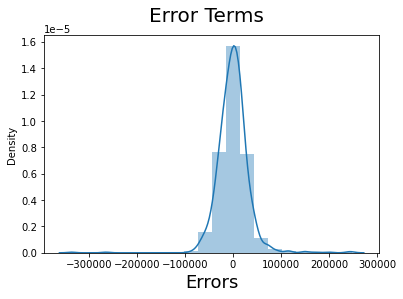

In [426]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Evaluate R2 of Train model

In [427]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.82

In [428]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1145368274727.6255
1121810259.282689
33493.43606264799


In [429]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

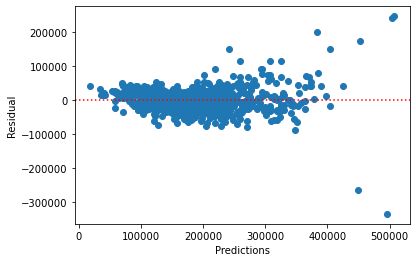

In [430]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [431]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,0.361022,-0.293313,-0.703973,-0.431488,-1.181447,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.776063,-0.937484,-0.927153,-0.985354,0.232304,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,120500,-0.016404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,0.660517,-0.440205,0.871757,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.741868,0.308833,-0.927153,-0.985354,0.298247,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.622834,196500,-1.137362,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,-0.964030,-0.293313,1.501060,0.381373,-0.154845,0.212191,-0.789230,-0.124502,-0.498789,-0.837450,-0.247791,0.784821,-0.753316,0.175669,-0.234155,-0.776063,-0.314326,0.622148,0.658513,0.278464,0.306009,-0.329996,1.023633,-0.393502,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,

In [432]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.0,439.0,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.0,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008

In [433]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [434]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageFinish_RFn'], dtype='object')

In [435]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [436]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [438]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     136.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.18e-159
Time:                        16:34:57   Log-Likelihood:                -5169.4
No. Observations:                 439   AIC:                         1.037e+04
Df Residuals:                     421   BIC:                         1.045e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.83e+05   3186.755     57.413      0.000    1.77e+05    1.89e+05
OverallQual           2.051e+04   2920.362      7.024      0.000    1.48e+04    2.63e+04
BsmtExposure          8077.2284   1821.134      4.435      0.000    4497.580    1.17e+04
1stFlrSF              2.855e+04   2394.248     11.923      0.000    2.38e+04    3.33e+04
2ndFlrSF              2.136e+04   1922.138     11.113      0.000    1.76e+04    2.51e+04
KitchenQual            1.07e+04   2141.275      4.998      0.000    6493.923    1.49e+04
GarageCars            1.007e+04   2206.787      4.563      0.000    5731.566    1.44e+04
MSSubClass_190        3193.3649   1.49e+04      0.215      0.830    -2.6e+04    3.24e+04
MSZoning_RM          -1.535e+04   4733.109     -3.243      0.001   -2.47e+04   -6048.145
Neighborhood_Edwards -2684.1485   7167.695     -0.374      0.708   -1.68e+04    1.14e+04
Neighborhood_NoRidge  4.109e+04   1.38e+04      2.987      0.003    1.41e+04    6.81e+04
Neighborhood_NridgHt  6.627e+04   8783.152      7.545      0.000     4.9e+04    8.35e+04
Neighborhood_Somerst  4808.2603   7110.189      0.676      0.499   -9167.632    1.88e+04
Neighborhood_StoneBr   7.63e+04   1.02e+04      7.503      0.000    5.63e+04    9.63e+04
Exterior1st_BrkFace   1.293e+04   7569.823      1.708      0.088   -1948.997    2.78e+04
Exterior1st_Stucco    7911.8612   1.48e+04      0.533      0.594   -2.13e+04    3.71e+04
GarageType_Attchd    -5017.6638   3912.293     -1.283      0.200   -1.27e+04    2672.396
GarageFinish_RFn     -1865.8625   3769.368     -0.495      0.621   -9274.988    5543.263
==============================================================================
Omnibus:                       78.167   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.055
Skew:                           0.528   Prob(JB):                    4.88e-121
Kurtosis:                       8.401   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [439]:
# Making predictions
y_pred = lm.predict(X_test_new)

### calculate r2 score of Test model

In [440]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.81

In [441]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

525965406037.6681
1198098874.8010662
34613.564895876676


In [442]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [443]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,OverallQual,2.90
4,KitchenQual,2.00
2,1stFlrSF,1.90
15,GarageType_Attchd,1.83
5,GarageCars,1.74
16,GarageFinish_RFn,1.63
3,2ndFlrSF,1.56
10,Neighborhood_NridgHt,1.34
9,Neighborhood_NoRidge,1.24
1,BsmtExposure,1.21


Text(0, 0.5, 'y_pred')

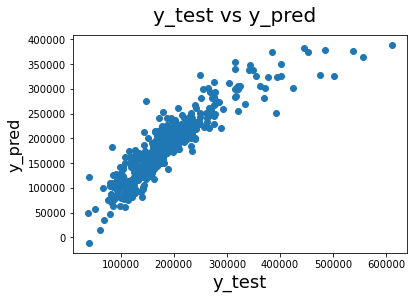

In [444]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [447]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageFinish_RFn'], dtype='object')

In [448]:
#final dataframe 
final_df = house_data[['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_190', 
                       'MSZoning_RM', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 
                       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco', 
                       'GarageType_Attchd', 'GarageFinish_RFn']]
final_df.head()

,OverallQual,BsmtExposure,1stFlrSF,2ndFlrSF,KitchenQual,GarageCars,MSSubClass_190,MSZoning_RM,Neighborhood_Edwards,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Exterior1st_BrkFace,Exterior1st_Stucco,GarageType_Attchd,GarageFinish_RFn
0,7,1,856,854,4,2,0,0,0,0,0,0,0,0,0,1,1
1,6,4,1262,0,3,2,0,0,0,0,0,0,0,0,0,1,1
2,7,2,920,866,4,2,0,0,0,0,0,0,0,0,0,1,1
3,7,1,961,756,4,3,0,0,0,0,0,0,0,0,0,0,0
4,8,3,1145,1053,4,3,0,0,0,1,0,0,0,0,0,1,1


### Final evalution
- No of Variables = `17` i.e. `OverallQual`, `BsmtExposure`, `1stFlrSF`, `2ndFlrSF`, `KitchenQual`, `GarageCars`, `MSSubClass_190`, `MSZoning_RM`, `Neighborhood_Edwards`, `Neighborhood_NoRidge`, `Neighborhood_NridgHt`, `Neighborhood_Somerst`, `Neighborhood_StoneBr`, `Exterior1st_BrkFace`, `Exterior1st_Stucco`, `GarageType_Attchd`, `GarageFinish_RFn`
- VIF < `5`
- p-value < `0.05`
- r2 score for Train Data set model = `0.82`
- r2 score for Test Data set model = `0.81`

In [449]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8205274164110317
0.8138653336955189
1145368274727.6255
525965406037.6681
1121810259.282689
1198098874.8010662


### Ridge Regression

In [450]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [451]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [452]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 22070.75167268  11052.34199305  23493.51775878  19657.50814718
  11286.70635789   7489.46564805  -7914.98470895 -16333.63982811
 -12323.15216227  44384.19482187  34966.22155568  11912.08040533
  10990.4459287   11148.43494256 -12625.39365294   7754.79239579
  -7508.21829654]


In [453]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8180856328144884
0.8101316563524396
1160951387252.6895
536515751971.36975
1137072857.2504303
1222131553.4655347


## Lasso

In [454]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [455]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [456]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [457]:
lasso.coef_

array([ 21363.03676254,  11166.34781321,  23309.01984347,  19428.72714353,
        10890.27268289,   7017.21581953,  -7033.72662092, -16530.17630682,
       -12761.65723238,  57525.67516136,  42563.97845899,  14601.72948227,
        14595.22605224,  12172.76099387, -12485.08639602,   7759.55884871,
        -7634.94180747])

In [458]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8199138607826384
0.8110674307552553
1149283898704.7764
533871510715.78577
1125645346.4297516
1216108224.8651156


In [459]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.205274e-01,8.180856e-01,8.199139e-01
1,R2 Score (Test),8.138653e-01,8.101317e-01,8.110674e-01
2,RSS (Train),1.145368e+12,1.160951e+12,1.149284e+12
3,RSS (Test),5.259654e+11,5.365158e+11,5.338715e+11
4,MSE (Train),3.349344e+04,3.372051e+04,3.355064e+04
5,MSE (Test),3.461356e+04,3.495900e+04,3.487274e+04


## Lets observe the changes in the coefficients after regularization

In [460]:
betas = pd.DataFrame(index=X.columns)

In [461]:
betas.rows = X.columns

In [462]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [465]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,20396.663124,22070.751673,21363.036763
BsmtExposure,11410.369406,11052.341993,11166.347813
1stFlrSF,23444.736692,23493.517759,23309.019843
2ndFlrSF,19900.966507,19657.508147,19428.727144
KitchenQual,10621.336170,11286.706358,10890.272683
GarageCars,6738.561738,7489.465648,7017.215820
MSSubClass_190,-11792.551608,-7914.984709,-7033.726621
MSZoning_RM,-16891.229312,-16333.639828,-16530.176307
Neighborhood_Edwards,-14321.095029,-12323.152162,-12761.657232
Neighborhood_NoRidge,61728.669269,44384.194822,57525.675161


### Que1: Double the values of Alpha for lasso & Ridge

In [466]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 22826.75639262  10844.80296811  23439.90790191  19450.86688161
  11675.22119831   7990.12924209  -5961.34910891 -15505.28186467
 -10799.91309885  34958.97774444  28285.95138286   8849.28206123
   6648.21669964   8601.2066185   -9993.65890639   7423.60893789
  -6617.24828832]
0.8147247127572341
0.807979717351144


___Coeff values are increasing as alpha will increase.r2_score of train data is also dropped___

In [468]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 22324.52727205  10922.70127249  23171.41765877  18956.94866742
  11158.18260308   7296.30936771  -2274.89090158 -16167.12663048
 -11201.43123513  53331.09845096  38213.7836237   11107.45091755
   4441.23532167   8270.88192129  -8047.21282848   7135.61662029
  -6522.95930828]
0.818074902058302
0.8068387849792255


___As alpha value increased more feautrues removed from model. But r2score is also dropped by 1% in both test and train data___

### Question3: Drop the Top 5 features and rebuild lasso
___Top 5 features are `Neighborhood_NoRidge`, `Neighborhood_NridgHt`,`1stFlrSF`, `2ndFlrSF`, `OverallQual`___

In [470]:
X_train_new.columns

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'KitchenQual', 'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageFinish_RFn'], dtype='object')

In [471]:
#Drop 5 features
X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '1stFlrSF','2ndFlrSF', 
                                'OverallQual'], axis=1)

In [472]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '1stFlrSF','2ndFlrSF', 
                                'OverallQual'], axis=1)

In [473]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [474]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [475]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [476]:
lasso.coef_

array([ 12657.83302358,  32428.37109613,  25553.73382191,      0.        ,
       -20754.615542  , -10665.01339023,      0.        ,      0.        ,
         2317.5063678 ,      0.        ,  10846.09185157,  -1978.96800401])

In [477]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.5965502488846866
0.60988176257791


##### ___After dropping the top 5 features model r2 score is very low i.e. 59% for Train and 60% for Test.___

In [478]:
X_train_new.columns

Index(['BsmtExposure', 'KitchenQual', 'GarageCars', 'MSSubClass_190', 'MSZoning_RM', 'Neighborhood_Edwards', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkFace', 'Exterior1st_Stucco', 'GarageType_Attchd', 'GarageFinish_RFn'], dtype='object')

___Next top 5 features after drooping 5 main predictors `1stFlrSF` ,`MSSubClass_90`, `MSSubClass_120`, `TotalBsmtSF`, `HouseStyle_1Story`___ 